In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import re

import seaborn as sns
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv', error_bad_lines=False)
df = df.dropna()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
df['length'] = [len(i) for i in df['password']]

df['lower_freq'] = [len([j for j in i if j.islower()]) / len(i) for i in df['password']]

df['upper_freq'] = [len([j for j in i if j.isupper()]) / len(i) for i in df['password']]

df['digit_freq'] = [len([j for j in i if j.isdigit()]) / len(i) for i in df['password']]

df['special_freq'] = [len([j for j in i if not j.isdigit() and not j.isalpha()]) / len(i) for i in df['password']]

In [6]:
df['identical_freq'] = [(re.match('([a-z\\d])\\1\\1\\1\\1\\1\\1\\1+', i) is not None) for i in df['password']]

In [7]:
chi2(df['identical_freq'].values.reshape(-1, 1), df['strength'].values)

(array([5.9143319]), array([0.05196598]))

In [8]:
df['type_breaks'] = [len(re.findall('[aA-zZ]+',i)) + len(re.findall('[\W]+', i)) + len(re.findall('[0-9]+', i)) - 1 for i in df['password']]

In [9]:
df.describe(include = 'all')

,password,strength,length,lower_freq,upper_freq,digit_freq,special_freq,identical_freq,type_breaks
count,669639,669639.000000,669639.000000,669639.000000,669639.000000,669639.000000,669639.000000,669639,669639.000000
unique,669639,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,asiato22,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,669622,NaN
mean,NaN,0.990198,9.991648,0.614575,0.053526,0.328268,0.003631,NaN,1.655226
std,NaN,0.507947,2.819954,0.221056,0.153799,0.198807,0.027132,NaN,1.455616
min,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,1.000000,8.000000,0.500000,0.000000,0.187500,0.000000,NaN,1.000000
50%,NaN,1.000000,9.000000,0.666667,0.000000,0.300000,0.000000,NaN,1.000000
75%,NaN,1.000000,11.000000,0.777778,0.000000,0.400000,0.000000,NaN,2.000000


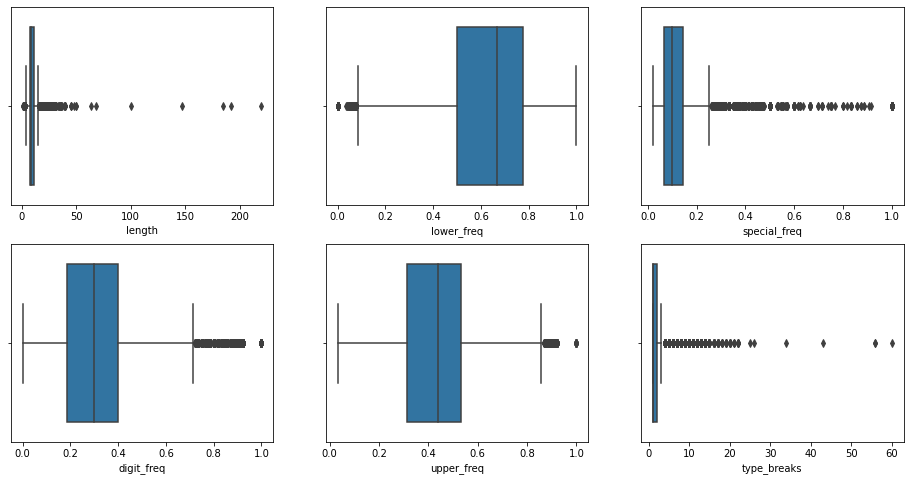

In [10]:
plt.figure(figsize = (16,8))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax1 = sns.boxplot(x = 'length', data = df)

ax2 = plt.subplot2grid((2, 3), (0, 1))
ax2 = sns.boxplot(x = 'lower_freq', data = df)

ax3 = plt.subplot2grid((2, 3), (1, 0))
ax3 = sns.boxplot(x = 'digit_freq', data = df)

ax4 = plt.subplot2grid((2, 3), (1, 1))
ax4 = sns.boxplot(x = 'upper_freq', data = df[df['upper_freq'] > 0])

ax5 = plt.subplot2grid((2, 3), (0, 2))
ax5 = sns.boxplot(x = 'special_freq', data = df[df['special_freq'] > 0])

ax6 = plt.subplot2grid((2, 3), (1, 2))
ax6 = sns.boxplot(x = 'type_breaks', data = df[df['type_breaks'] > 0])

In [11]:
from IPython.display import display

cols = ['length', 'lower_freq', 'upper_freq', 'digit_freq', 'special_freq']

for i in cols:
    print(i)
    display(df[df[i] > 0].groupby('strength')[i].agg(['max', 'min', 'mean', 'median', pd.Series.mode]))

length


,max,min,mean,median,mode
strength,,,,,
0,7,1,6.549604,7,7
1,13,8,9.618964,9,9
2,220,14,15.932497,16,16


lower_freq


,max,min,mean,median,mode
strength,,,,,
0,1.000000,0.142857,0.726116,0.714286,0.714286
1,0.923077,0.076923,0.642883,0.666667,0.666667
2,0.933333,0.035714,0.423765,0.400000,0.375000


upper_freq


,max,min,mean,median,mode
strength,,,,,
0,1.000000,0.142857,0.644086,0.714286,0.666667
1,0.923077,0.076923,0.479708,0.500000,0.111111
2,0.904762,0.033333,0.398180,0.437500,0.500000


digit_freq


,max,min,mean,median,mode
strength,,,,,
0,1.000000,0.142857,0.279764,0.285714,0.285714
1,0.923077,0.076923,0.362770,0.333333,0.333333
2,0.916667,0.005208,0.196346,0.187500,0.125000


special_freq


,max,min,mean,median,mode
strength,,,,,
0,1.000000,0.142857,0.216826,0.142857,0.142857
1,0.916667,0.076923,0.158072,0.111111,0.111111
2,0.740741,0.020000,0.103332,0.071429,0.071429


1    496801
0     89701
2     83137
Name: strength, dtype: int64 





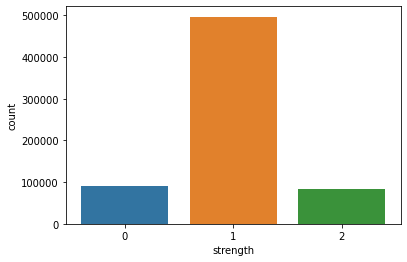

In [12]:
sns.countplot(x = 'strength', data = df)
plt.plot()

print(df['strength'].value_counts(),'\n\n\n')

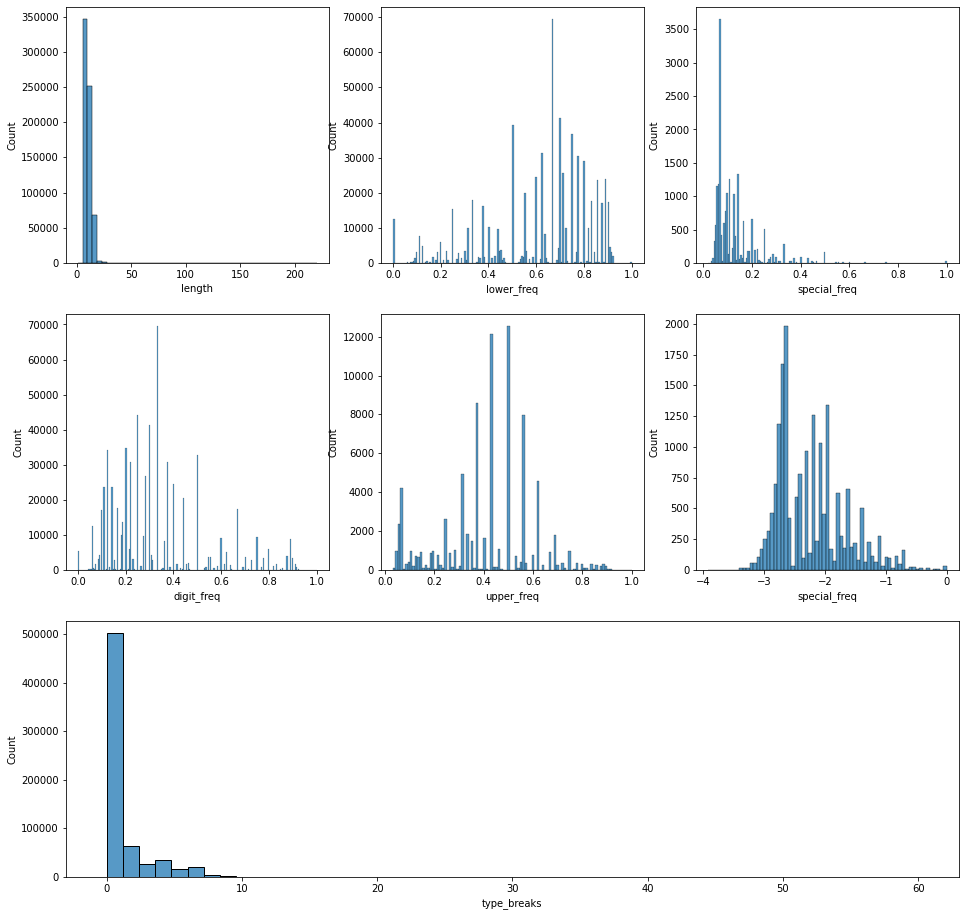

In [13]:
plt.figure(figsize = (16,16))
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax1 = sns.histplot(x = 'length', data = df, bins=50)

ax2 = plt.subplot2grid((3, 3), (0, 1))
ax2 = sns.histplot(x = 'lower_freq', data = df)

ax3 = plt.subplot2grid((3, 3), (1, 0))
ax3 = sns.histplot(x = 'digit_freq', data = df)

ax4 = plt.subplot2grid((3, 3), (1, 1))
ax4 = sns.histplot(x = 'upper_freq', data = df[df['upper_freq'] > 0])

ax5 = plt.subplot2grid((3, 3), (0, 2))
ax5 = sns.histplot(x = 'special_freq', data = df[df['special_freq'] > 0])

ax6 = plt.subplot2grid((3, 3), (1, 2))
ax6 = sns.histplot(x = df[df['special_freq'] > 0]['special_freq'].apply(np.log)) 
ax7 = plt.subplot2grid((3, 3), (2, 0), colspan = 3)
ax7 = sns.histplot(x = 'type_breaks', data = df, bins=50)

[]

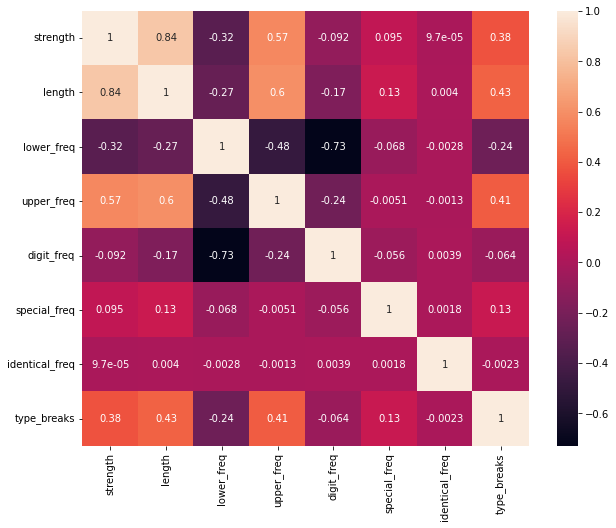

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.plot()